<a href="https://colab.research.google.com/github/keithlaspona/google-colab/blob/main/Phase4_Group3_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 4: Data Analysis and Machine Learning
**DMA / ADBMS Final Project**

Members:


*   Chris Andrei Irag*
*   Hernel Juanico
*   Keith Laspoña
*   Airyll Sanchez
*   Kobe Marco Olaguir
*   Ruszed Jy Ayad

University of Science and Technology of Southern Philippines

*chrisandrei.irag@1.ustp.edu.ph

In [1]:
#needed libraries
try:
  import os
  import psycopg2
  from sqlalchemy import create_engine
  from wordcloud import WordCloud

  import string
  import polars as pl
  import pandas as pd
  import requests

  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np

  import re
  import time
  from datetime import datetime

  from dotenv import load_dotenv; load_dotenv()
except ModuleNotFoundError:
  !pip install python-dotenv
  !pip install wordcloud
  from dotenv import load_dotenv; load_dotenv()

  print("""
  Please restart the kernel and upload your .env file if you haven't already.
  """)

#Database credentials

PGEND_POINT = os.environ["PGEND_POINT"]
PGDATABASE_NAME = os.environ["PGDATABASE_NAME"]
PGPORT = os.environ["PGPORT"]
PGUSER_NAME = os.environ["PGUSER_NAME"]
PGPASSWORD = os.environ["PGPASSWORD"]

#helper functions

def connect():

    conn_string = f"host={PGEND_POINT} port={PGPORT} dbname={PGDATABASE_NAME} user={PGUSER_NAME} password={PGPASSWORD}"

    conn = psycopg2.connect(conn_string)
    print(f'{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}\tConnected!')

    cursor = conn.cursor()

    return conn, cursor

def disconnect(conn):
    conn.close()
    print(f'{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}\tDisconnected.')


def get_table(table: str):
    conn, cursor = connect()
    table = pl.read_database(f'SELECT * FROM {table}', conn)
    disconnect(conn)

    return table

def splitter(text: str):
  """
  Split a genre string into a list of strings.
  """
  text = re.sub(r'[{}"]', '', text)
  return re.findall(r'[^,]+', text)

def get_all_genres(series):
  """
  Get all unqiue genres from a series of genres.
  """
  es = set()
  for i in series:
    es = es | set(splitter(i))

  return es

def counter(word_list: list, dataframe):
  """
  Count the occurences of a list of words. Each count is added in a dataframe.
  """
  for i in word_list:
    if len(i) > 0:
      dataframe.loc[i, 'Count'] += 1

  return dataframe


  Please restart the kernel and upload your .env file if you haven't already.
  


# Genres descriptive stats

In [2]:
df = get_table('genres_season').to_pandas()
df

2024-12-05 16:46:10	Connected!
2024-12-05 16:46:12	Disconnected.


,anime_id,romaji_title,release_day,release_month,average_score,anime_popularity,num_of_episodes,episode_duration,num_of_favourites,anime_genres,anime_season,year
0,107372,Mahoutsukai ni Narenakatta Onnanoko no Hanashi.,5,10,62,8076,12,24,59,{Fantasy},FALL,2024
1,111314,Uzumaki,29,9,57,69169,4,23,968,"{Drama,Horror,Mystery,Supernatural}",FALL,2024
2,136880,BEASTARS FINAL SEASON Part 1,5,12,0,19760,0,0,125,"{Drama,Mystery,Psychological,""Slice of Life""}",FALL,2024
3,138522,Thunderbolt Fantasy: Touriken Yuuki 4,5,10,71,793,0,0,10,"{Action,Drama,Fantasy}",FALL,2024
4,141182,Seirei Gensouki 2,8,10,70,43191,12,24,1101,"{Action,Drama,Fantasy,Romance}",FALL,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
109,183651,Kidou Senshi Gundam ALC ENCOUNTER,24,11,64,698,1,5,5,"{Mecha,Sci-Fi}",FALL,2024
110,184099,Agent Blue,10,11,49,132,1,1,1,{Horror},FALL,2024
111,184288,Kazuhiho to Marie no Youkoso Kitchen.,14,11,68,43,6,3,3,{Comedy},FALL,2024
112,184694,Ore dake Level Up na Ken: ReAwakening,29,11,81,2030,1,114,89,"{Action,Adventure,Fantasy}",FALL,2024


In [3]:
counter_index = get_all_genres(df['anime_genres'])

count_table = pd.DataFrame(
    {'Count': [0]},
    index=list(counter_index)
)

for idx, i in df.iterrows():
  count_table = counter(splitter(i['anime_genres']), count_table)

count_table['Presence'] = count_table['Count'] / len(df)
count_table.sort_values(by='Count', ascending=False, inplace=True)
count_table.head()

,Count,Presence
Comedy,40,0.350877
Action,36,0.315789
Fantasy,34,0.298246
Drama,30,0.263158
Romance,22,0.192982


In [4]:
count_table.to_csv('times_genres_associated.csv')

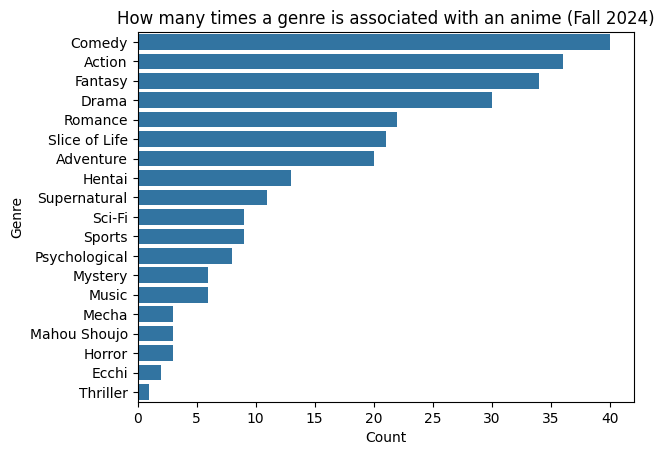

In [5]:
sns.barplot(data=count_table, y=count_table.index, x='Count',  orient='h')

plt.ylabel('Genre')
plt.title('How many times a genre is associated with an anime (Fall 2024)')
plt.savefig('times-associated.svg', format='svg', transparent=True)

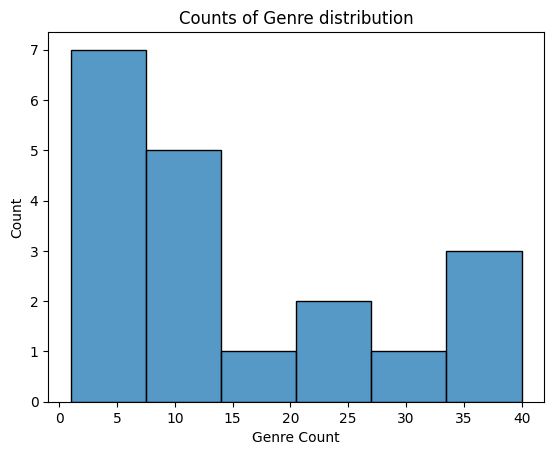

In [ ]:
sns.histplot(data=count_table, x='Count')
plt.xlabel('Genre Count')
plt.title('Counts of Genre distribution')
plt.savefig('genre-distribution.svg', format='svg', transparent=True)

## Other descriptive stats

In [ ]:
df.describe()

,anime_id,release_day,release_month,average_score,anime_popularity,num_of_episodes,episode_duration,num_of_favourites,year
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.0
mean,172145.412281,11.684211,10.149123,59.824561,13100.122807,7.517544,18.587719,314.350877,2024.0
std,12523.729146,9.493655,1.199059,23.437828,22502.284677,7.767908,17.664429,819.300694,0.0
min,107372.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,2024.0
25%,169799.000000,5.000000,10.000000,58.250000,556.750000,0.000000,3.000000,11.000000,2024.0
50%,175078.000000,7.000000,10.000000,67.000000,2531.000000,6.000000,24.000000,44.500000,2024.0
75%,179795.500000,18.750000,10.000000,72.000000,19048.000000,12.000000,24.000000,290.500000,2024.0
max,184998.000000,31.000000,12.000000,95.000000,164980.000000,26.000000,114.000000,7491.000000,2024.0


In [ ]:
df['release_day'] = df['release_day'].astype('string')
df['release_month'] = df['release_month'].astype('string')
df['year'] = df['year'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   anime_id           114 non-null    int64 
 1   romaji_title       114 non-null    object
 2   release_day        114 non-null    string
 3   release_month      114 non-null    string
 4   average_score      114 non-null    int64 
 5   anime_popularity   114 non-null    int64 
 6   num_of_episodes    114 non-null    int64 
 7   episode_duration   114 non-null    int64 
 8   num_of_favourites  114 non-null    int64 
 9   anime_genres       114 non-null    object
 10  anime_season       114 non-null    object
 11  year               114 non-null    string
 12  derived_date       114 non-null    object
dtypes: int64(6), object(4), string(3)
memory usage: 11.7+ KB


In [ ]:
df[['release_month', 'release_day']] = df[['release_month', 'release_day']].replace(0, 1)
df[['release_month', 'release_day', 'year']].min()

<ipython-input-194-47c8e6c2c052>:2: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  df[['release_month', 'release_day', 'year']].min()


,0
release_month,0
release_day,0
year,2024


In [ ]:
# df[['release_month', 'release_day']].replace(np.NaN, 1, inplace=True)
df['derived_date'] = df['release_month'] + '/' + df['release_day'] + '/' + df['year']

In [ ]:
df['derived_date'] = df['derived_date'].apply(lambda x: re.sub(r'0/0/2024', '01/01/2024', x))


In [ ]:
df

,anime_id,romaji_title,release_day,release_month,average_score,anime_popularity,num_of_episodes,episode_duration,num_of_favourites,anime_genres,anime_season,year,derived_date
0,107372,Mahoutsukai ni Narenakatta Onnanoko no Hanashi.,5,10,62,8076,12,24,59,{Fantasy},FALL,2024,10/5/2024
1,111314,Uzumaki,29,9,57,69169,4,23,968,"{Drama,Horror,Mystery,Supernatural}",FALL,2024,9/29/2024
2,136880,BEASTARS FINAL SEASON Part 1,5,12,0,19760,0,0,125,"{Drama,Mystery,Psychological,""Slice of Life""}",FALL,2024,12/5/2024
3,138522,Thunderbolt Fantasy: Touriken Yuuki 4,5,10,71,793,0,0,10,"{Action,Drama,Fantasy}",FALL,2024,10/5/2024
4,141182,Seirei Gensouki 2,8,10,70,43191,12,24,1101,"{Action,Drama,Fantasy,Romance}",FALL,2024,10/8/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,183651,Kidou Senshi Gundam ALC ENCOUNTER,24,11,64,698,1,5,5,"{Mecha,Sci-Fi}",FALL,2024,11/24/2024
110,184099,Agent Blue,10,11,49,132,1,1,1,{Horror},FALL,2024,11/10/2024
111,184288,Kazuhiho to Marie no Youkoso Kitchen.,14,11,68,43,6,3,3,{Comedy},FALL,2024,11/14/2024
112,184694,Ore dake Level Up na Ken: ReAwakening,29,11,81,2030,1,114,89,"{Action,Adventure,Fantasy}",FALL,2024,11/29/2024


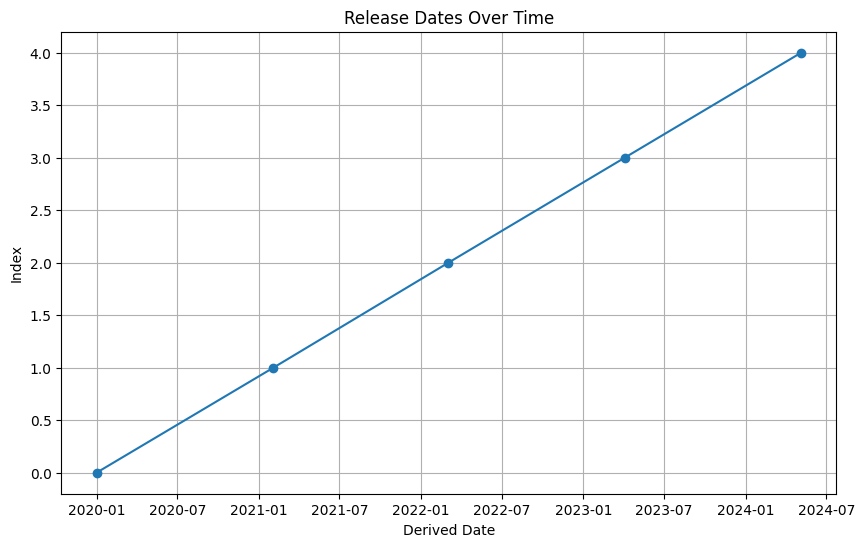

In [6]:
# Sample data to simulate the DataFrame
data = {
    'release_day': [1, 2, 3, 4, 5],
    'release_month': [1, 2, 3, 4, 5],
    'year': [2020, 2021, 2022, 2023, 2024]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert columns to string type
df['release_day'] = df['release_day'].astype('string')
df['release_month'] = df['release_month'].astype('string')
df['year'] = df['year'].astype('string')

# Replace 0 with 1 in 'release_month' and 'release_day'
df[['release_month', 'release_day']] = df[['release_month', 'release_day']].replace('0', '1')

# Create 'derived_date' column
df['derived_date'] = df['release_month'] + '/' + df['release_day'] + '/' + df['year']

# Replace '0/0/2024' with '01/01/2024'
df['derived_date'] = df['derived_date'].apply(lambda x: re.sub(r'0/0/2024', '01/01/2024', x))

# Convert 'derived_date' to datetime format
df['derived_date'] = pd.to_datetime(df['derived_date'], format='%m/%d/%Y')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['derived_date'], range(len(df)), marker='o')

# Adding labels and title
plt.xlabel('Derived Date')
plt.ylabel('Index')
plt.title('Release Dates Over Time')
plt.grid(True)
plt.show()

In [ ]:
df['derived_date'] = pd.to_datetime(df['derived_date'], yearfirst=False)

<Axes: xlabel='derived_date', ylabel='average_score'>

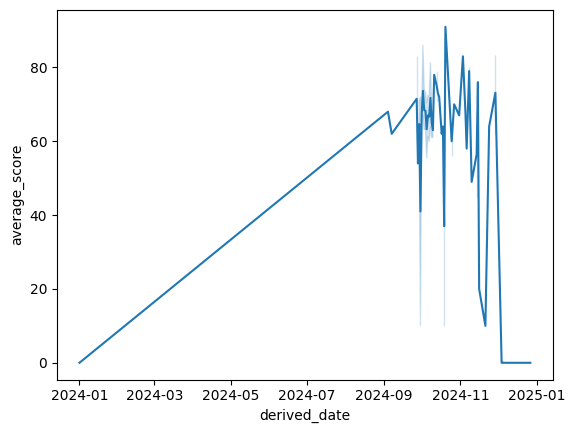

In [ ]:
sns.lineplot(data=df, x=df[df['derived_date'] > ''], y='average_score')

## Co-occurence

In [ ]:
occs = []
for idx, i in df.iterrows():
  genres = splitter(i['anime_genres'])
  if len(genres) > 0:
    occs.append(genres)

In [ ]:
from collections import Counter
from itertools import combinations

# Create co-occurrence pairs
pairs = []
for genres in occs:
    pairs.extend(combinations(genres, 2))  # Generate all pairs for each occurrence

# Count co-occurrence frequencies
co_occurrence = Counter(pairs)
print(co_occurrence)


Counter({('Action', 'Fantasy'): 20, ('Action', 'Adventure'): 17, ('Adventure', 'Fantasy'): 15, ('Comedy', 'Fantasy'): 14, ('Action', 'Comedy'): 14, ('Comedy', 'Romance'): 13, ('Comedy', 'Slice of Life'): 12, ('Action', 'Drama'): 11, ('Drama', 'Romance'): 9, ('Drama', 'Fantasy'): 8, ('Comedy', 'Drama'): 8, ('Fantasy', 'Romance'): 7, ('Fantasy', 'Slice of Life'): 7, ('Drama', 'Supernatural'): 6, ('Action', 'Romance'): 6, ('Action', 'Sci-Fi'): 6, ('Adventure', 'Comedy'): 6, ('Drama', 'Psychological'): 5, ('Action', 'Psychological'): 5, ('Romance', 'Slice of Life'): 5, ('Action', 'Supernatural'): 5, ('Drama', 'Mystery'): 4, ('Drama', 'Slice of Life'): 4, ('Comedy', 'Sci-Fi'): 4, ('Action', 'Sports'): 4, ('Drama', 'Sports'): 4, ('Comedy', 'Supernatural'): 4, ('Adventure', 'Psychological'): 3, ('Fantasy', 'Psychological'): 3, ('Mecha', 'Sci-Fi'): 3, ('Adventure', 'Drama'): 3, ('Adventure', 'Romance'): 3, ('Slice of Life', 'Supernatural'): 3, ('Horror', 'Mystery'): 2, ('Mystery', 'Supernatura

In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges with weights
for pair, weight in co_occurrence.items():
    G.add_edge(pair[0], pair[1], weight=weight)

In [ ]:
G['Fantasy']['Action']

{'weight': 20}

In [ ]:
num_colors = len(G.nodes())
cmap = plt.get_cmap('tab20')  # Use a discrete colormap like tab20 or tab10
colors = cmap(np.linspace(0, 1, num_colors))

In [ ]:
count_table

,Count,Presence
Comedy,40,0.350877
Action,36,0.315789
Fantasy,34,0.298246
Drama,30,0.263158
Romance,22,0.192982
Slice of Life,21,0.184211
Adventure,20,0.175439
Hentai,13,0.114035
Supernatural,11,0.096491
Sci-Fi,9,0.078947


In [ ]:
weighted_degree = dict(G.degree(weight="weight"))

In [ ]:
node_calc = pd.DataFrame({
    'weighted_degree_scaled': [50 * weighted_degree[node] for node in G.nodes()],
    'presence_scaled': [100 * 100 * count_table.loc[node, 'Presence'] for node in G.nodes()]

}, index=G.nodes())

node_calc

,weighted_degree_scaled,presence_scaled
Drama,3500,2631.578947
Horror,200,263.157895
Mystery,550,526.315789
Supernatural,1400,964.912281
Psychological,1200,701.754386
Slice of Life,1850,1842.105263
Action,4600,3157.894737
Fantasy,4150,2982.456140
Romance,2550,1929.824561
Comedy,4100,3508.771930


In [ ]:
node_calc['presence_scaled'].max()

3508.771929824561

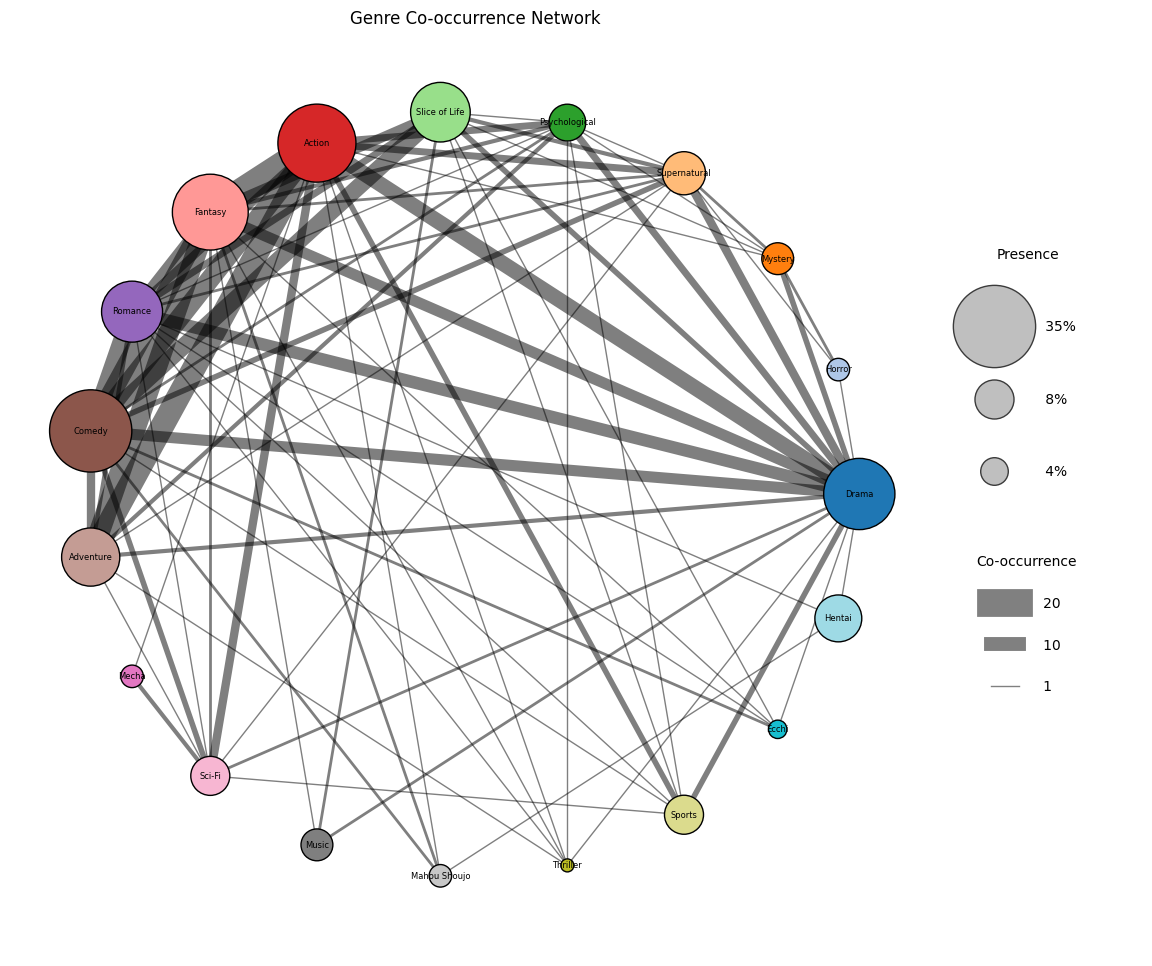

In [ ]:
# Map weighted degree to node sizes
node_sizes = [50 * weighted_degree[node] for node in G.nodes()]

# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.circular_layout(G, scale=1, center=None, dim=2) # Layout of the nodes
nx.draw_networkx_nodes(G, pos, node_size=node_calc['presence_scaled'], node_color=colors, edgecolors='black', ax=ax)
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] for u, v in G.edges()], alpha=.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=6, font_color="black", ax=ax)

ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

#legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements1 = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#bfbfbf", markeredgecolor='#3b3b3b', markersize=((node_calc['presence_scaled'].max())**0.5), label=f"      {round(count_table['Presence'].max()*100)}%"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#bfbfbf", markeredgecolor='#3b3b3b', markersize=((node_calc['presence_scaled'].median())**0.5), label=f"      {round(count_table['Presence'].median()*100)}%"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#bfbfbf", markeredgecolor='#3b3b3b', markersize=((node_calc['presence_scaled'].quantile(0.25))**0.5), label=f"      {round(count_table['Presence'].quantile(.25)*100)}%"),
]
legend_elements2 = [
    Line2D([0], [0], color="gray", lw=20, markerfacecolor="gray", markeredgecolor='#3b3b3b', label="   20"),
    Line2D([0], [0], color="gray", lw=10, markerfacecolor="gray", markeredgecolor='#3b3b3b', label="   10"),
    Line2D([0], [0], color="gray", lw=1, markerfacecolor="gray", markeredgecolor='#3b3b3b',  label="   1"),
]

legend_elements3 = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor="#bfbfbf", markeredgecolor='#3b3b3b', markersize=50, label="", alpha=0),
]


legend1 = plt.legend(handles=legend_elements1, frameon=False, loc="upper right", labelspacing=4.2, title='Presence', bbox_to_anchor=(1.16, 0.78))
legend2 = plt.legend(handles=legend_elements2, frameon=False, loc="lower right", labelspacing=2.0, title='Co-occurrence', bbox_to_anchor=(1.16, 0.27))
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.legend(handles=legend_elements3 , loc="upper right", frameon=False, bbox_to_anchor=(1.225, 0.8))

plt.title("Genre Co-occurrence Network")
plt.savefig('co-occurence.svg', format='svg', transparent=True, bbox_inches="tight")


In [ ]:
#node size
count_table

,Count,Presence
Comedy,39,0.348214
Action,36,0.321429
Fantasy,34,0.303571
Drama,29,0.258929
Romance,21,0.187500
Adventure,20,0.178571
Slice of Life,20,0.178571
Hentai,13,0.116071
Supernatural,11,0.098214
Sci-Fi,9,0.080357


In [ ]:
#line thickness
edge_weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
edge_weights[0:5]

[1, 3, 6, 11, 8]

In [ ]:
# co-occurence
import pandas as pd
import itertools
counter_index = list(get_all_genres(df['anime_genres']))
# Sample data: list of lists, each list contains genres for one item (e.g., movie)
data = occs

# Initialize an empty set to collect all unique genres
unique_genres = itertools.chain(*data)  # Flatten and find unique elements

# Create a DataFrame with 0s, using unique genres as both columns and rows
occurrence_matrix = pd.DataFrame(0, index=counter_index, columns=counter_index)

# Populate the matrix with co-occurrence counts
for genres in data:
    # Generate all unique pairs of genres that occur together
    genre_pairs = itertools.combinations(genres, 2)
    # print(*genre_pairs)
    for g1, g2 in genre_pairs:
        occurrence_matrix.loc[g1, g2] += 1
        occurrence_matrix.loc[g2, g1] += 1  # Because the matrix is symmetric

# Display the occurrence matrix
occurrence_matrix

,Thriller,Sports,Drama,Mystery,Comedy,Romance,Ecchi,Mahou Shoujo,Fantasy,Horror,Adventure,Hentai,Action,Supernatural,Slice of Life,Mecha,Sci-Fi,Psychological,Music
Thriller,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
Sports,0,0,4,0,1,1,0,0,0,0,0,0,4,0,1,0,1,1,0
Drama,1,4,0,3,8,9,1,0,8,1,3,1,11,6,3,0,2,4,2
Mystery,0,0,3,0,0,0,0,0,0,2,0,0,1,2,0,0,0,0,0
Comedy,0,1,8,0,0,12,2,2,14,0,6,0,14,4,12,0,4,2,0
Romance,1,1,9,0,12,0,1,0,7,0,3,1,6,2,5,0,1,1,0
Ecchi,0,0,1,0,2,1,0,0,1,0,0,0,0,0,1,0,0,0,0
Mahou Shoujo,0,0,0,0,2,0,0,0,2,0,0,1,1,0,0,0,0,0,0
Fantasy,1,0,8,0,14,7,1,2,0,0,15,0,20,2,7,0,2,3,1
Horror,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
occurrence_matrix.to_csv('co-occurence-matrix.csv')
pd.Series(weighted_degree).to_csv('weighted-degree.csv')

Genre_a = []
Genre_b = []
weights = []

for i in G.edges(data=True):
  Genre_a.append(i[0])
  Genre_b.append(i[1])
  weights.append(i[2]['weight'])

pd.DataFrame({
    'Genre_a': Genre_a,
    'Genre_b': Genre_b,
    'weights': weights
}).to_csv('edge-weights.csv')

In [ ]:
counter = 0
for i in occs:
  if len(i) > counter:
    counter += 1

counter

6

## other metrics

In [ ]:
#prevalence
weighted_degree = dict(G.degree(weight="weight"))
weighted_degree

{'Drama': 67,
 'Horror': 4,
 'Mystery': 8,
 'Supernatural': 28,
 'Action': 92,
 'Fantasy': 83,
 'Romance': 50,
 'Comedy': 81,
 'Adventure': 50,
 'Psychological': 21,
 'Mecha': 4,
 'Sci-Fi': 21,
 'Music': 5,
 'Slice of Life': 34,
 'Mahou Shoujo': 6,
 'Thriller': 6,
 'Sports': 13,
 'Ecchi': 6,
 'Hentai': 3}

In [ ]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Drama': 0.8888888888888888,
 'Horror': 0.16666666666666666,
 'Mystery': 0.2222222222222222,
 'Supernatural': 0.611111111111111,
 'Action': 0.7222222222222222,
 'Fantasy': 0.7222222222222222,
 'Romance': 0.7222222222222222,
 'Comedy': 0.6666666666666666,
 'Adventure': 0.5,
 'Psychological': 0.5,
 'Mecha': 0.1111111111111111,
 'Sci-Fi': 0.5,
 'Music': 0.16666666666666666,
 'Slice of Life': 0.4444444444444444,
 'Mahou Shoujo': 0.2222222222222222,
 'Thriller': 0.3333333333333333,
 'Sports': 0.38888888888888884,
 'Ecchi': 0.2777777777777778,
 'Hentai': 0.16666666666666666}

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, weight="weight")
betweenness_centrality

{'Drama': 0.1000544662309368,
 'Horror': 0.014433551198257082,
 'Mystery': 0.011165577342047931,
 'Supernatural': 0.06023965141612201,
 'Action': 0.18338779956427015,
 'Fantasy': 0.09460784313725489,
 'Romance': 0.13316993464052287,
 'Comedy': 0.004575163398692811,
 'Adventure': 0.014433551198257082,
 'Psychological': 0.05501089324618736,
 'Mecha': 0.0,
 'Sci-Fi': 0.05582788671023965,
 'Music': 0.0,
 'Slice of Life': 0.015468409586056645,
 'Mahou Shoujo': 0.04379084967320261,
 'Thriller': 0.26296296296296295,
 'Sports': 0.09324618736383442,
 'Ecchi': 0.08616557734204795,
 'Hentai': 0.048583877995642705}

In [ ]:
edge_betweenness = nx.edge_betweenness_centrality(G, weight="weight")
edge_betweenness


{('Drama', 'Horror'): 0.06798245614035087,
 ('Drama', 'Mystery'): 0.0037037037037037034,
 ('Drama', 'Supernatural'): 0.0,
 ('Drama', 'Action'): 0.0,
 ('Drama', 'Fantasy'): 0.0,
 ('Drama', 'Romance'): 0.0,
 ('Drama', 'Comedy'): 0.0,
 ('Drama', 'Slice of Life'): 0.0,
 ('Drama', 'Adventure'): 0.0,
 ('Drama', 'Psychological'): 0.0,
 ('Drama', 'Thriller'): 0.07105263157894735,
 ('Drama', 'Sci-Fi'): 0.00682261208576998,
 ('Drama', 'Sports'): 0.0,
 ('Drama', 'Ecchi'): 0.06666666666666665,
 ('Drama', 'Music'): 0.017543859649122806,
 ('Drama', 'Hentai'): 0.050536062378167636,
 ('Horror', 'Mystery'): 0.015399610136452241,
 ('Horror', 'Supernatural'): 0.047709551656920084,
 ('Mystery', 'Supernatural'): 0.026364522417153993,
 ('Mystery', 'Action'): 0.079775828460039,
 ('Supernatural', 'Fantasy'): 0.015545808966861599,
 ('Supernatural', 'Slice of Life'): 0.00253411306042885,
 ('Supernatural', 'Action'): 0.0,
 ('Supernatural', 'Adventure'): 0.024610136452241718,
 ('Supernatural', 'Comedy'): 0.0,
 ('

In [ ]:
density = nx.density(G)
density
clustering_coeff = nx.clustering(G)
clustering_coeff

{'Drama': 0.44166666666666665,
 'Horror': 1.0,
 'Mystery': 0.8333333333333334,
 'Supernatural': 0.6363636363636364,
 'Action': 0.5384615384615384,
 'Fantasy': 0.5641025641025641,
 'Romance': 0.6025641025641025,
 'Comedy': 0.6515151515151515,
 'Adventure': 0.8888888888888888,
 'Psychological': 0.8333333333333334,
 'Mecha': 1.0,
 'Sci-Fi': 0.7222222222222222,
 'Music': 1.0,
 'Slice of Life': 0.6785714285714286,
 'Mahou Shoujo': 0.5,
 'Thriller': 1.0,
 'Sports': 0.8095238095238095,
 'Ecchi': 1.0,
 'Hentai': 0.3333333333333333}

In [ ]:
clustering_coeff = nx.clustering(G)
clustering_coeff

{'Drama': 0.44166666666666665,
 'Horror': 1.0,
 'Mystery': 0.8333333333333334,
 'Supernatural': 0.6363636363636364,
 'Action': 0.5384615384615384,
 'Fantasy': 0.5641025641025641,
 'Romance': 0.6025641025641025,
 'Comedy': 0.6515151515151515,
 'Adventure': 0.8888888888888888,
 'Psychological': 0.8333333333333334,
 'Mecha': 1.0,
 'Sci-Fi': 0.7222222222222222,
 'Music': 1.0,
 'Slice of Life': 0.6785714285714286,
 'Mahou Shoujo': 0.5,
 'Thriller': 1.0,
 'Sports': 0.8095238095238095,
 'Ecchi': 1.0,
 'Hentai': 0.3333333333333333}

14

## Long Format

In [ ]:
df = get_table('genres_season').to_pandas()
df.head()

2024-12-05 05:48:15	Connected!
2024-12-05 05:48:15	Disconnected.


,anime_id,romaji_title,release_day,release_month,average_score,anime_popularity,num_of_episodes,episode_duration,num_of_favourites,anime_genres,anime_season,year
0,107372,Mahoutsukai ni Narenakatta Onnanoko no Hanashi.,5,10,62,8076,12,24,59,{Fantasy},FALL,2024
1,111314,Uzumaki,29,9,57,69169,4,23,968,"{Drama,Horror,Mystery,Supernatural}",FALL,2024
2,136880,BEASTARS FINAL SEASON Part 1,5,12,0,19760,0,0,125,"{Drama,Mystery,Psychological,""Slice of Life""}",FALL,2024
3,138522,Thunderbolt Fantasy: Touriken Yuuki 4,5,10,71,793,0,0,10,"{Action,Drama,Fantasy}",FALL,2024
4,141182,Seirei Gensouki 2,8,10,70,43191,12,24,1101,"{Action,Drama,Fantasy,Romance}",FALL,2024


In [ ]:
lf = df[['romaji_title', 'anime_genres', 'average_score', 'anime_popularity', 'num_of_favourites', 'num_of_episodes']].copy()
lf.head()

,romaji_title,anime_genres,average_score,anime_popularity,num_of_favourites,num_of_episodes
0,Mahoutsukai ni Narenakatta Onnanoko no Hanashi.,{Fantasy},62,8076,59,12
1,Uzumaki,"{Drama,Horror,Mystery,Supernatural}",57,69169,968,4
2,BEASTARS FINAL SEASON Part 1,"{Drama,Mystery,Psychological,""Slice of Life""}",0,19760,125,0
3,Thunderbolt Fantasy: Touriken Yuuki 4,"{Action,Drama,Fantasy}",71,793,10,0
4,Seirei Gensouki 2,"{Action,Drama,Fantasy,Romance}",70,43191,1101,12


In [ ]:
lf_csv = pd.DataFrame(columns=['romaji_title', 'anime_genres'])

for idx, i in lf.iterrows():
  genres = splitter(i['anime_genres'])

  for j in genres:
    lf_csv = pd.concat(
        [
        lf_csv,
        pd.DataFrame({
            'romaji_title': [i['romaji_title']],
            'anime_genres': [j],
            'average_score': [i['average_score']],
            'anime_popularity': [i['anime_popularity']],
            'num_of_favourites': [i['num_of_favourites']],
            'num_of_episodes': [i['num_of_episodes']]
            })
        ],
        axis=0,
        ignore_index=True
        )

lf_csv.to_csv('anime_title_genres_long-format.csv', index=False)

# Text Analysis

In [ ]:
df = get_table('REVIEW_SENTIMENT_ANALYSIS').to_pandas()
df

2024-12-05 03:21:22	Connected!
2024-12-05 03:21:23	Disconnected.


,review_text,review_title
0,~~~\n\n#*Originally written for my YouTube cha...,The Animation Was the Scariest Thing About Thi...
1,>#####___This review is spoiler-free.___\n\n~~...,"Scandalous, slovenly, and slapdash—a screw-up ..."
2,"***\n<img src=""https://sm.ign.com/t/ign_pk/pho...",They had us in the first quarter
3,__This review is spoilerless and anything rela...,Another Studio Tarnishes Ito's Name Once Again
4,# Review is light in spoilers\nwhat a boring s...,Uzumaki: a spiral to boredom
5,Two days after the second episode of Uzumaki r...,"Is it better to cancel an unfinished series, o..."
6,"<p align=""justify"">Okay, standard disclaimer f...",mfw the suit is mobile
7,When I knew a few weeks ago that Megumi Ishita...,A love letter to Oda's creation
8,The special begins on a recap of the Marinefor...,Ishitani would do right to sacrifice the notic...


In [ ]:
# Generate a word cloud from the 'review_text' column
text = ' '.join(df['review_text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

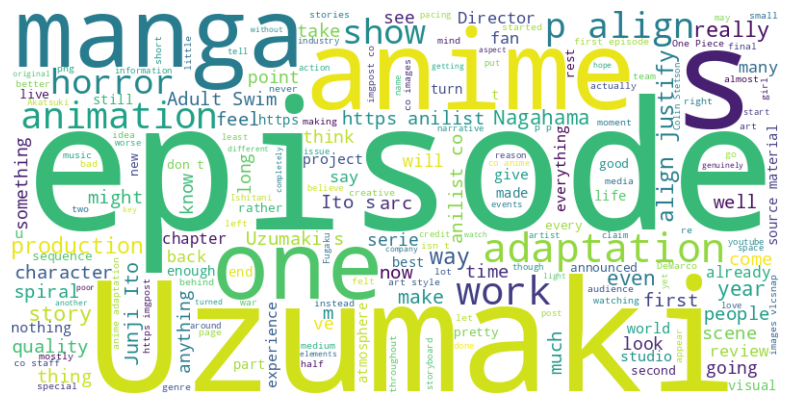

In [ ]:
# Generate word cloud from the 'review_text' & 'review_title' columns
text = ' '.join(df['review_text'].tolist() + df['review_title'].tolist())
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

preprocessing

In [ ]:
## removing html code
try:
  import contractions
except Exception:
  !pip install contractions
  import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
text = df['review_text'][0]
text

"~~~\n\n#*Originally written for my YouTube channel. Abridged and edited for AniList.*\n\n~~~\n\n***\n\n\nSo, how ‘bout that new *Uzumaki* , huh?\n\n~~~ img100%(https://lostinanime.com/wp-content/uploads/2024/09/Uzumaki-01-28-1.jpg) ~~~\n\nIt should come as a surprise to absolutely no one that the ‘24 adaptation of *Uzumaki* is a resounding flop. And we’re all really upset about it. At the time of writing, I can assure you that several AniList reviewers will make that very-justified anger known over the coming days. *Uzumaki* is a beloved modern horror classic from the mind of *mangaka* [Junji Ito](https://anilist.co/staff/97410/Junji-Itou), who was yet again done dirty by a comically bad adaptation of arguably his most beloved work. So if you’ve come here to hear some thorough thrashing of this disaster-class of an anime…\n\nYeah, I’m not really interested in doing that. Sorry.\n\nYou don’t need me to tell you that this adaptation is disappointing. I trust that your gut will tell ya’ 

In [ ]:
len(df['review_text'][0])

38680

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
test = re.sub(f"\(https:(.*?)\)", '', contractions.fix(text)) #remove (https ... ) and expand contractions
test = re.sub(f"img(.*?)%", '', test) #remove img ... %
test = re.sub(f"(\n\n)", ' ', test) #replace new lines with a whitespace
test = re.sub("['" + r'…;:<>“”‘’!"#$%&~,—\-"\.+\?\*\^(\n)\[\]\{\}]+', '', test).lower() #special characters and random unique unicode characters
test

' originally written for my youtube channel abridged and edited for anilist   so how bout that new uzumaki  huh    it should come as a surprise to absolutely no one that the 24 adaptation of uzumaki is a resounding flop and we are all really upset about it at the time of writing i can assure you that several anilist reviewers will make that veryjustified anger known over the coming days uzumaki is a beloved modern horror classic from the mind of mangaka junji ito who was yet again done dirty by a comically bad adaptation of arguably his most beloved work so if you have come here to hear some thorough thrashing of this disasterclass of an anime yeah i am not really interested in doing that sorry you do not need me to tell you that this adaptation is disappointing i trust that your gut will tell ya how goofy some scenes are in this what i am curious about exploring is not the how but why why did the people behind uzumaki 24 make the decisions that they did unlike the shows color palette 

In [ ]:
word_list = re.split(r'\W+', test)

In [ ]:
#stop words removal
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


word_list = [word for word in word_list if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# lemmatize
import nltk; nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

word_list_lemmatized = [lemmatizer.lemmatize(word, pos='a') for word in word_list]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(word_list_lemmatized)
bagofwords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bagofwords

,10,1795,19,1998,1s,20,2003,2019,2020,2021,...,writing,written,wrong,ya,yaaaaay,yeah,year,years,yousa,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd

# Convert the list to a Pandas DataFrame
word_list_df = pd.DataFrame(word_list_lemmatized, columns=['words'])

# Now you can use to_csv on the DataFrame
word_list_df.to_csv('word_list_lemmatized.csv', index=False)

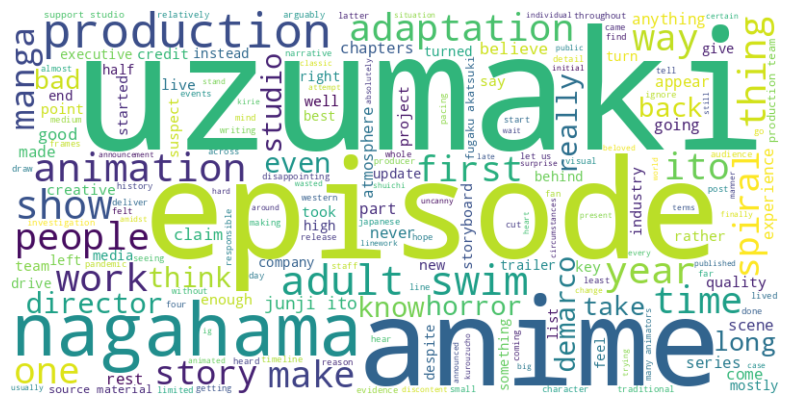

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list_lemmatized))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
cloud = wordcloud.to_file('wordcloud.png')

<Axes: >

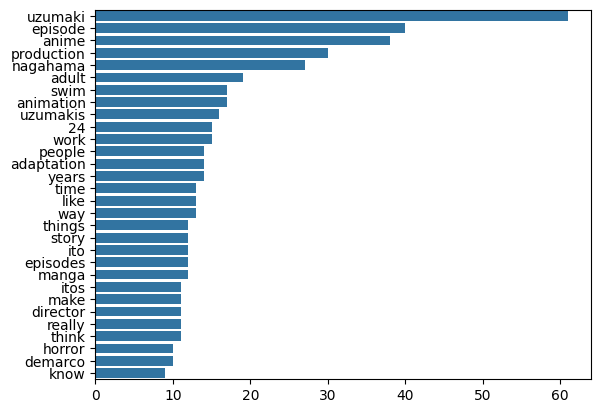

In [ ]:
sns.barplot(data=bagofwords.sum().sort_values(ascending=False).head(30), orient='h')

# Machine learning

In [ ]:
df = get_table('genres_season').to_pandas()
df.head()

2024-12-05 05:15:15	Connected!
2024-12-05 05:15:16	Disconnected.


,anime_id,romaji_title,release_day,release_month,average_score,anime_popularity,num_of_episodes,episode_duration,num_of_favourites,anime_genres,anime_season,year
0,107372,Mahoutsukai ni Narenakatta Onnanoko no Hanashi.,5,10,62,8076,12,24,59,{Fantasy},FALL,2024
1,111314,Uzumaki,29,9,57,69169,4,23,968,"{Drama,Horror,Mystery,Supernatural}",FALL,2024
2,136880,BEASTARS FINAL SEASON Part 1,5,12,0,19760,0,0,125,"{Drama,Mystery,Psychological,""Slice of Life""}",FALL,2024
3,138522,Thunderbolt Fantasy: Touriken Yuuki 4,5,10,71,793,0,0,10,"{Action,Drama,Fantasy}",FALL,2024
4,141182,Seirei Gensouki 2,8,10,70,43191,12,24,1101,"{Action,Drama,Fantasy,Romance}",FALL,2024


<Axes: >

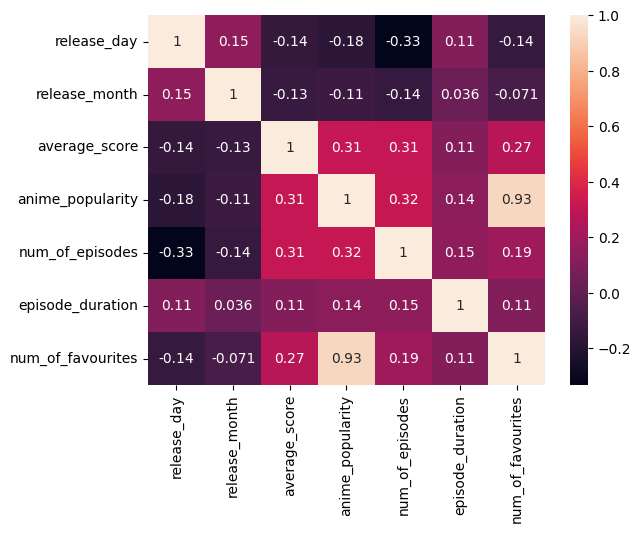

In [ ]:
# selecting features for machine learning
ml_data = df.drop(['anime_id', 'year', 'romaji_title', 'anime_genres', 'anime_season'], axis=1)
sns.heatmap(ml_data.corr(), annot=True)

num_of_favourites and anime_popularity seems highly related with each other, we drop this feature

### Trying out multiple models

Let's have our target variable 'average_score'

In [ ]:
ml_data.drop('anime_popularity', axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# multiple linear regression
X = ml_data.drop('average_score', axis=1)
Y = ml_data['average_score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

lm = LinearRegression().fit(X, Y)

In [ ]:
print('No splits, in-sample R2 score:', lm.score(X, y))

No splits, in-sample R2 score: 0.15281085840831798


In [ ]:
lm = LinearRegression().fit(x_train, y_train)
print('With train split, in-sample R2 score', lm.score(x_train, y_train))

With train split, in-sample R2 score 0.126112138195966


In [ ]:
print('With train split, out-of-sample R2 score', lm.score(x_test, y_test))

With train split, out-of-sample R2 score 0.17785432438061355


Verdict: poor performance

Conclusion:

The features do not explain the score, meaning that...
the release month and day of an anime show doesn't necessarily affect the average score nor does the episode count or duration. Let's try scaling down to simple linear regression


In [ ]:
X = ml_data[['num_of_favourites']]
Y = ml_data['average_score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

lm = LinearRegression().fit(x_train, y_train)

In [ ]:
lm.score(x_test, y_test)

0.09106178713039781

Verdict: very poor performance

Let's introduce feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# multiple linear regression
X = ml_data.drop('average_score', axis=1)
Y = ml_data['average_score']

In [ ]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,release_day,release_month,num_of_episodes,episode_duration,num_of_favourites
0,-0.707180,-0.124916,0.579596,0.307747,-0.313045
1,1.831986,-0.962585,-0.454830,0.250886,0.801336
2,-0.707180,1.550423,-0.972042,-1.056914,-0.232133
3,-0.707180,-0.124916,-0.972042,-1.056914,-0.373116
4,-0.389784,-0.124916,0.579596,0.307747,0.964386
...,...,...,...,...,...
109,1.302993,0.712754,-0.842739,-0.772610,-0.379246
110,-0.178187,0.712754,-0.842739,-1.000053,-0.384150
111,0.245007,0.712754,-0.196223,-0.886331,-0.381698
112,1.831986,0.712754,-0.842739,5.425226,-0.276267


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=13)

In [ ]:
lm = LinearRegression().fit(x_train, y_train)
lm.score(x_test, y_test)

0.0197069939919855

Verdict: very poor

Excercise conclusion:

The features might not explain the average score but
results are still inconclusive, we need more data